<h1 style='font-size: 50px; text-align: center; font-family: 'Formata', serif;'>
    Analysis of Complex Data, Master in Data Science & Engineering, 2023-2024
</h1>

<h1 style='font-size: 30px; font-weight: bold; margin-bottom: 10px; font-family: 'Formata', serif;'>
        1. Import libraries, classes, custom functions, and data load</h1>

In [1]:
import pandas as pd
import utility_func as utils
import DataLoaderLocal


# Adjust display options to show all columns
pd.set_option('display.max_columns', None)

In [2]:
business, reviews, users = DataLoaderLocal.LoadJSON()

<h1 style='font-size: 30px; font-weight: bold; margin-bottom: 10px; font-family: 'Formata', serif;'>
        2. EDA - Exploratory Data Analysis</h1>

In [3]:
# Aggregation of data, with relevant columns, from the business and reviews datasets
cities = business[['business_id', 'city', 'review_count', 'is_open']]
reviews_small = reviews[['review_id', 'business_id', 'stars']]

cities_reviews = pd.merge(reviews_small, cities, left_on='business_id', right_on='business_id', how='left')
cities_reviews

,review_id,business_id,stars,city,review_count,is_open
0,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,3,North Wales,169,1
1,BiTunyQ73aT9WBnpR9DZGw,7ATYjTIgM3jUlt4UM3IypQ,5,Philadelphia,144,0
2,saUsX_uimxRlCVr67Z4Jig,YjUWPpI6HXG530lwP-fb2A,3,Tucson,47,1
3,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,5,Philadelphia,181,1
4,Sx8TMOWLNuJBWer-0pcmoA,e4Vwtrqf-wpJfwesgvdgxQ,4,New Orleans,32,0
...,...,...,...,...,...,...
6990275,H0RIamZu0B0Ei0P4aeh3sQ,jals67o91gcrD4DC81Vk6w,5,Boise,36,1
6990276,shTPgbgdwTHSuU67mGCmZQ,2vLksaMmSEcGbjI5gywpZA,5,Wimauma,30,1
6990277,YNfNhgZlaaCO5Q_YJR4rEw,R1khUUxidqfaJmcpmGd4aw,4,Willow Grove,32,1
6990278,i-I4ZOhoX70Nw5H0FwrQUA,Rr9kKArrMhSLVE9a53q-aA,5,Indianapolis,83,1


In [4]:
n_cities = cities_reviews['city'].nunique()
print(f'Number of cities: {n_cities}')

Number of cities: 1416


<h1 style='font-size: 20px; font-weight: bold; margin-bottom: 10px; font-family: 'Formata', serif;'>
        2.2 Analysing cities with more reviews and with high variance of stars in the reviews</h1>

<p style='margin-bottom: 12px; font-size: 16px; font-family: 'Formata', serif;'>The idea with this analysis is to find the cities that have a higher variation on the reviews made by users on that location. Notice that both the business and reviews datasets have a column named 'stars', however the column chosen was from the reviews dataset because the other is simply the stars of the restaurant, not the stars given by users (interactions of our RS).</p>

<p style='margin-bottom: 12px; font-size: 16px; font-family: 'Formata', serif;'>So, the code below computes the variance and the number of reviews for all 1416 cities and sorts the resulting dataframe by the variance of the review's stars in a descending order. After that, only cities with more than 300.000 reviews are considered, and then the final selection results in the remaining 5 cities with the highest variance.</p>

<p style='margin-bottom: 12px; font-size: 16px; font-family: 'Formata', serif;'>Now, although Reno is the top city, I decided to apply a describe() to the stars of the reviews of each city, to better understand the distribution of reviews. Looking at the quartiles, the one that stood out was Tucson because at least 25% of the reviews have 2 stars or less, which shows more lower reviews than all other cities, with a first quartile of 3 stars.</p>

<p style='margin-bottom: 12px; font-size: 16px; font-family: 'Formata', serif;'>Therefore, given the importance of having a lot of reviews and a variety of review stars, it appears to me that Tucson is a very good candidate for the city to be chosen.</p>

In [5]:
# Compute the variance of ratings for each city
star_variance_by_city = cities_reviews.groupby('city')['stars'].var().reset_index()
star_variance_by_city.columns = ['city', 'star_var']

# Compute the count of each city in the original DataFrame
city_count = cities_reviews['city'].value_counts().reset_index()
city_count.columns = ['city', 'count']

# Merge the variance and count DataFrames on the 'City' column
result_df = pd.merge(star_variance_by_city, city_count, on='city')

# Sort the results by variance in descending order
result_df = result_df.sort_values(by='star_var', ascending=False)

# Choosing the cities with higher variance and with more than 300k reviews
result_df_limit5 = result_df[result_df['count'] >= 300000].sort_values(by='star_var', ascending=False).head(5)

result_df_limit5

,city,star_var,count
926,Reno,2.351522,351573
1210,Tucson,2.348581,404880
1157,Tampa,2.249768,454889
745,Nashville,2.052586,451571
511,Indianapolis,2.000884,361489


In [6]:
reno = utils.describe_cities(cities_reviews, 'Reno')
tucson = utils.describe_cities(cities_reviews, 'Tucson')
tampa = utils.describe_cities(cities_reviews, 'Tampa')
nashville = utils.describe_cities(cities_reviews, 'Nashville')
indianapolis = utils.describe_cities(cities_reviews, 'Indianapolis')

city_describe = reno
city_describe['Tucson'] = tucson
city_describe['Tampa'] = tampa
city_describe['Nashville'] = nashville
city_describe['Indianapolis'] = indianapolis

city_describe

,Reno,Tucson,Tampa,Nashville,Indianapolis
count,351573.000000,404880.000000,454889.000000,451571.000000,361489.000000
mean,3.748280,3.700897,3.753065,3.818166,3.823646
std,1.533467,1.532508,1.499923,1.432685,1.414526
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


array([[<Axes: title={'center': 'stars'}>]], dtype=object)

array([[<Axes: title={'center': 'stars'}>]], dtype=object)

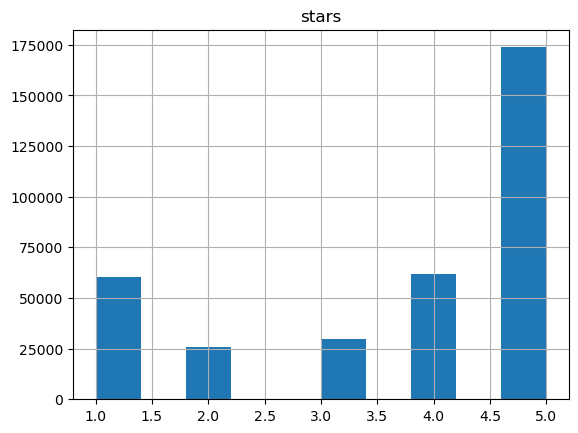

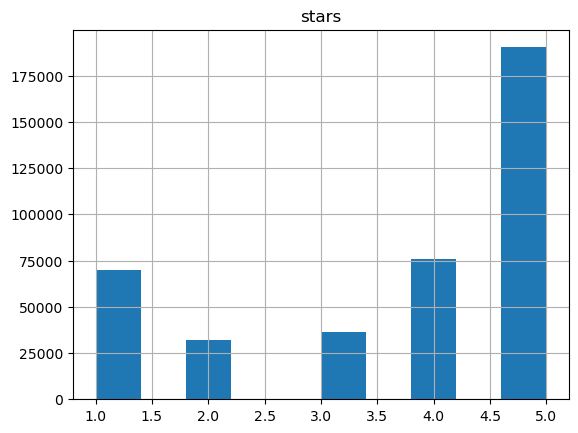

In [7]:
display(cities_reviews[cities_reviews['city'] == 'Reno'][['stars']].hist())
display(cities_reviews[cities_reviews['city'] == 'Tucson'][['stars']].hist())